In [2]:
import numpy as np


class ProcessGBM:

    np.random.seed(0)
    
    def __init__(self, mu, sigma):
        self._mu = mu
        self._sigma = sigma

    def Simulate(self, T=0.2, dt = (0.2/252), S0=100):
        n = round(T / dt)
        
        mu = self._mu
        sigma = self._sigma

        gaussian_increments = np.random.normal(size=n - 1)
        res = np.zeros(n)
        res[0] = S0
        S = S0
        sqrt_dt = dt ** 0.5
        for i in range(n - 1):
            S = S + S * mu * dt + sigma * \
                S * gaussian_increments[i] * sqrt_dt
            res[i + 1] = S

        return res
    
class ProcessCEV:
    
    np.random.seed(0)

    def __init__(self, mu, sigma, gamma):
        self._mu = mu
        self._sigma = sigma
        self._gamma = gamma

    def Simulate(self, T=0.2, dt = (0.2/252), S0=100):
        n = round(T / dt)
        
        mu = self._mu
        sigma = self._sigma
        gamma = self._gamma

        gaussian_increments = np.random.normal(size=n - 1)
        res = np.zeros(n)
        res[0] = S0
        S = S0
        sqrt_dt = dt ** 0.5
        for i in range(n - 1):
            S = S + S * mu * dt + sigma * \
                (S ** gamma) * gaussian_increments[i] * sqrt_dt
            res[i + 1] = S

        return res

In [3]:
S = 100
L = 85
K = 100
sigma = 0.3
r = 0.1
T =  0.2
dt = 0.2/252

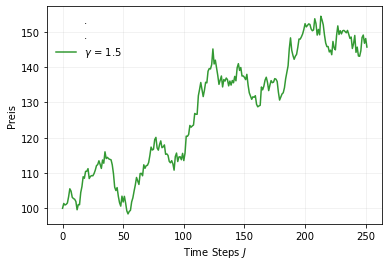

In [33]:
import matplotlib.pyplot as plt

S = 100

sigma = 0.3
r = 0.1
T =  0.2
dt = 0.2/252

i = 38

np.random.seed(i)
#plt.plot(ProcessCEV(r, sigma, 0.9).Simulate(T, dt), label="$\gamma$ = 0.5", color = 'orange', alpha = 0.8)
plt.plot(ProcessCEV(r, sigma, 0.9).Simulate(T, dt), label=".", color = 'orange', alpha = 0)

np.random.seed(i)
#plt.plot(ProcessGBM(r, sigma).Simulate(T, dt), label = '$\gamma$ = 1.0', color = 'blue', alpha = 0.8)
plt.plot(ProcessGBM(r, sigma).Simulate(T, dt),label=".", color = 'blue', alpha = 0)


np.random.seed(i)
plt.plot(ProcessCEV(r, sigma, 1.1).Simulate(T, dt), label = '$\gamma$ = 1.5', color = 'green', alpha = 0.8)
#plt.plot(ProcessCEV(r, sigma, 1.1).Simulate(T, dt), color = 'green', alpha = 0)

plt.xlabel('Time Steps $J$')
plt.ylabel('Preis')

#plt.axhline(y = 100, color = 'black', linestyle = '--', linewidth = 1)

plt.legend(fancybox = True, framealpha=0)
plt.grid(alpha = 0.2)
#plt.savefig('CEV_alle.png', dpi = 1000, transparent = True)
#plt.savefig('CEV_05.png', dpi = 1000, transparent = True)
#plt.savefig('CEV_1.png', dpi = 1000, transparent = True)
plt.savefig('CEV_15.png', dpi = 1000, transparent = True)

plt.show()